In [44]:
%matplotlib inline 
# this just tells the notebook to display images in the cells, rather than send it to a new window
try:
    # library for nicer visualizations
    import seaborn
    seaborn.set_context('poster')
except ImportError:
    pass

# Pandas and Databases

## *'If you torture the data long enough, it will confess.'*
*– Master Turtle*

Databases are collections of **tables**, organized into **columns** and **rows**, that allow us to store, select, and relate data to each other. The most common language is SQL, which comes in various forms.

`pandas` is a library (i.e., a code collection) of useful functions and objects to work with data. It can read from a variety of formats (CSV, Excel, ...), including SQL databases, and has a load of nifty tools to analyze and visualize the data.

# Databases

## Selecting data

In SQL, keywords are typically written in CAPS, as to distinguish them from variable names. The general command to get data from a DB is

```sql
SELECT <columns> FROM <table>
```

`<columns>` is a comma separated list of the column names we want. If we want **all** columns, we can use the Kleene star `*`.

### DISTINCT

If we want unique entries, we can use the `DISTINCT` keyword:
```sql
SELECT DISTINCT <columns> FROM <table>
```

This automatically gets rid of duplicates.

### WHERE

If we want only entries that fulfill a certain condition, we can use the `WHERE` keyword:
```sql
SELECT <columns> FROM <table> WHERE <condition>
```

`<condition>` is similar to a boolean statement in Python, but you don't need double equals for comparison. 

```sql
SELECT * FROM tweets WHERE followers > 100
```

You can also combine several conditions with `AND` and `OR`.

```sql
SELECT * FROM tweets WHERE followers > 100 AND is_retweet = 'False'
```



### LIMIT

Databases can be massive (that's kind of their point), so when you only want a bit to explore first, use the `LIMIT` keyword:
```sql
SELECT <columns> FROM <table> LIMIT <N>
```

`<N>` is the maximum number of entries you want

## Activity

Suppose you have a table called `movies` with the following columns:

<table>
    <tr>
        <th>name</th>
        <th>director</th>
        <th>year</th>
        <th>cost</th> 
        <th>gain</th>
    </tr>
</table>

How would you select
* the unique names of all the directors?
* all rows with films made in 1992?
* all films made before 2010 that cost under 10M?
* the top 10 films made in 2001 that made over 10M?

## Databases in Python

In order to use SQL in Python, we need a library called `sqlite3`.

In [45]:
import sqlite3 # this library allows us to connect to a database

First, we need to establish a connection to the database. We use the `connect()` function:

In [46]:
con = sqlite3.connect('example.db')

Databases can contain several **tables**, so before we proceed, it's a good idea to check how many we have and how they are called. To do this, we first need a **cursor** (think of it as an iterator over the table), and then execute an **SQL command**:

In [47]:
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('twitter_data',)]


# `pandas`

In [48]:
import pandas as pd # import pandas, but give it a shorthand name

`pandas` let's us read a table directly into Python. We just need a connection and a SQL command.

In [49]:
df = pd.read_sql("SELECT * FROM twitter_data", con=con)

The result of this process is a new object, called a **`DataFrame`**. You can think of it as a table on steroids.

`pandas` can read all kinds of *X*-separated files (using `read_csv()`), as well as Excel (`read_excel`).

By default, `read_csv()` uses commas `,` as separators, but we can tell it to use any other separator, for example tabs `\t` instead.

Now, we can look at the data. The file is rather big, so we will only look at the top 5 lines. We use the `head()` function for it.

The top row contains the column names.

In [51]:
df.tail()

,id,tweet,date,retweet,favorite,reply,brand,hashtags,links,media
615,662658782393008128,Vi ricordate quando abbiamo detto che finalmen...,2015-11-06 15:52:19,4,5,None,Ceres,"Halloween, CeresInvasion",https://amp.twimg.com/v/418886ad-98f3-42f9-96f...,
616,662590520552775685,#FF @Finzioni per la loro TOP 10 di libri paur...,2015-11-06 11:21:05,0,1,None,Ceres,"FF, CeresInvasion",https://twitter.com/Finzioni/status/6600433878...,
617,662191543999143936,RT @NinjAcademy: Il Social Media Team di @Cere...,2015-11-05 08:55:41,7,0,None,Ceres,,http://bit.ly/1GhGp6X,http://twitter.com/NinjAcademy/status/66217820...
618,661905866015264768,L’impegno contro lo #spreco secondo #Ceres. #s...,2015-11-04 14:00:30,4,16,None,Ceres,"spreco, Ceres, sapevatelo, ovvio, buona",,http://twitter.com/Ceres/status/66190586601526...
619,661864679078305792,Oggi faccio contento @matteosalvinimi. #4novem...,2015-11-04 11:16:51,22,42,None,Ceres,4novembre,,http://twitter.com/Ceres/status/66186467907830...


If you want to look at more lines, you need to give that number to the function as argument.

We can also look at the bottom rows, with `tail()`

## Activity: Loading data

* create a new variable, `tags`, and read in the distinct hashtags from the SQL table
* look at the last 3 lines of `tags`

In [65]:
# your code here
tags = pd.read_sql("SELECT DISTINCT hashtags FROM twitter_data WHERE hashtags!=''", con=con)
tags.tail(3)

,hashtags
53,"FF, CeresInvasion"
54,"spreco, Ceres, sapevatelo, ovvio, buona"
55,4novembre


# Indexing

### Columns

DataFrames, as well as databases, are organized in columns with names. To get an overview, use the `columns` attribute.

In [66]:
df.columns

Index(['id', 'tweet', 'date', 'retweet', 'favorite', 'reply', 'brand',
       'hashtags', 'links', 'media'],
      dtype='object')

To see just one column, access it with the same square bracket notation as for lists `[]`. However, rather than a number, use the column name string.

Alternatively, you can treat the name like an attribute of the `DataFrame`, and use a dot operator.

In [67]:
# Dictionary-style indexing
tweets1 = df['tweet']

# Alternative syntax
tweets2 = df.tweet

# check whether the Series are the same
print(tweets1 is tweets2)

True


The column returned from such an indexing is called a `Series` object.

To select several columns, we need to use the first method, and give it a list of column names. This returns a new `DataFrame` object.

In [70]:
print(type(df['tweet']))
print(type(df[['tweet', 'brand']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


#### Series functions

There are a lot of functions to analyze a `Series` object. One of the most useful is `describe()`, which gives us some descriptive statistics. Some of the ones used here, like `count()`, `mean()`, `max()`, and `min()` can be called by themselves.

In [13]:
df.retweet.describe()

count    620.000000
mean       3.466129
std       30.322667
min        0.000000
25%        0.000000
50%        0.500000
75%        2.000000
max      562.000000
Name: retweet, dtype: float64

## Acticvity

* what are the mean and median of the `favorite` column?
* what do you get when you use describe on a column with strings, like `reply` or `hashtags`?

In [72]:
# your code here
print(df['favorite'].mean(), df['favorite'].median())
df[['reply', 'hashtags']].describe()

4.458064516129032 1.0


,reply,hashtags
count,564,620
unique,508,57
top,OfficialGattara,ShareaCoke
freq,4,481


### Rows

Retrieving a row is also possible, but uses a different method, `iloc` (for **i**nteger **loc**ation), and the index of the row.

In [73]:
print(df.iloc[2])

id                                         681888466859364354
tweet       @Lianne_Wan We’d like to help you, Lianne.  Co...
date                                      2015-12-29 17:24:14
retweet                                                     0
favorite                                                    1
reply                                              Lianne_Wan
brand                                                CocaCola
hashtags                                                     
links                                http://CokeURL.com/vclnl
media                                                        
Name: 2, dtype: object


As with lists, you can also use slices, and even lists of integers:

In [75]:
print(len(df.tweet.iloc[2:4]))
print(len(df.tweet.iloc[[1,1,5,11]]))

2
5


## Adding new columns

Let's create a new column `ratio`, i.e., the ratio of favorites to retweets, based on the existing columns `retweet` and `favorite`.

In [76]:
df['ratio'] = (df.favorite / df.retweet)
df.ratio.head()

0    1.0
1    inf
2    inf
3    0.5
4    5.0
Name: ratio, dtype: float64

## Getting rid of outliers

## Masks

Uh-oh: we get some weird behavior for `ratio` if one of the two values is `0`. Let's check that.

In dataframes, we can select all the data that matches a certain condition, similar to an SQL table. We can do that with a simple boolean statement. The result is a `Series` object with boolean values, also called a **mask**:

In [77]:
no_retweet = df.retweet == 0
print(no_retweet.head())
print(type(no_retweet))

0    False
1     True
2     True
3    False
4    False
Name: retweet, dtype: bool
<class 'pandas.core.series.Series'>


## Activity

* add another, boolean, column to `df`, that signals whether the entry has a `media` link. Call the new column `has_media`

In [19]:
# your code here


We can combine several conditions with the `&` or `|` operators.

In [20]:
no_favorite = df.favorite == 0

print(len(df), 
      len(df[no_retweet | no_favorite]), 
      len(df[no_retweet & no_favorite]))

620 407 179


If we apply this mask to our DataFrame, we get *only* the rows where the condition is `True`

In [80]:
df[no_retweet | no_favorite].iloc[[1, 10]]

,id,tweet,date,retweet,favorite,reply,brand,hashtags,links,media,ratio
2,681888466859364354,"@Lianne_Wan We’d like to help you, Lianne. Co...",2015-12-29 17:24:14,0,1,Lianne_Wan,CocaCola,,http://CokeURL.com/vclnl,,inf
29,680612115254673409,@kianabaybay Time to celebrate! Step up to the...,2015-12-26 04:52:28,0,0,kianabaybay,CocaCola,ShareaCoke,https://amp.twimg.com/v/d2f2791e-07db-47eb-ab7...,,NaN


The value for `ratio`, `NaN`, stands for "**N**ot **a** **N**umber". Luckily, we can replace that value with `fillna()`

In [81]:
df_no_nan = df.fillna(0)
df_no_nan[no_retweet | no_favorite].iloc[[1, 10]]

,id,tweet,date,retweet,favorite,reply,brand,hashtags,links,media,ratio
2,681888466859364354,"@Lianne_Wan We’d like to help you, Lianne. Co...",2015-12-29 17:24:14,0,1,Lianne_Wan,CocaCola,,http://CokeURL.com/vclnl,,inf
29,680612115254673409,@kianabaybay Time to celebrate! Step up to the...,2015-12-26 04:52:28,0,0,kianabaybay,CocaCola,ShareaCoke,https://amp.twimg.com/v/d2f2791e-07db-47eb-ab7...,,0.0


## apply()

Let's also get rid of the `inf` values. We write a simple function that sets them to `0` and `apply` that function to our `Series`.

In [82]:
def f(x):
    if x == float('inf'):
        return 0.0 
    else:
        return x
    
df_no_nan.ratio = df_no_nan.ratio.apply(f)
df_no_nan[no_retweet | no_favorite].iloc[[1, 10]]

,id,tweet,date,retweet,favorite,reply,brand,hashtags,links,media,ratio
2,681888466859364354,"@Lianne_Wan We’d like to help you, Lianne. Co...",2015-12-29 17:24:14,0,1,Lianne_Wan,CocaCola,,http://CokeURL.com/vclnl,,0.0
29,680612115254673409,@kianabaybay Time to celebrate! Step up to the...,2015-12-26 04:52:28,0,0,kianabaybay,CocaCola,ShareaCoke,https://amp.twimg.com/v/d2f2791e-07db-47eb-ab7...,,0.0


## Visualization

### Histograms

`pandas` `DataFrame`s have built-in visualization methods under the property `plot`. To get a histogram of the ratios, we can call `hist()`

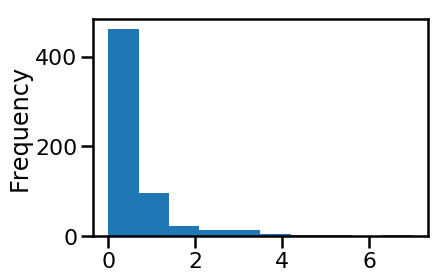

In [92]:
df_no_nan['ratio'].plot.hist()

In order to get a different representation, let's define the size of each `bin`. Adding `;` at the end of the line prevents the output of the `<matplotlib.axes._subplots.AxesSubplot at 0x118903320>` text.

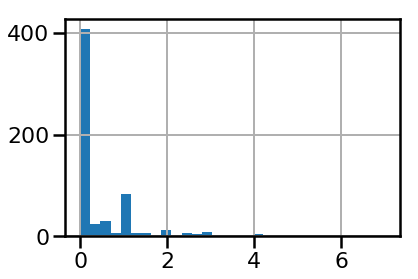

In [84]:
df_no_nan.ratio.hist(bins=30);

We can even separate the plots by another column, for example `brand`, using the keyword `by`.

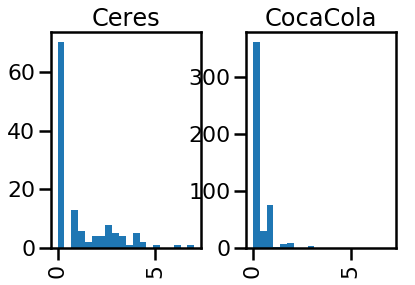

In [93]:
df_no_nan['ratio'].hist(by=df_no_nan.brand, bins=20);

Looks similar, but at different scales. To make the y-axis equivalent, use `sharey`

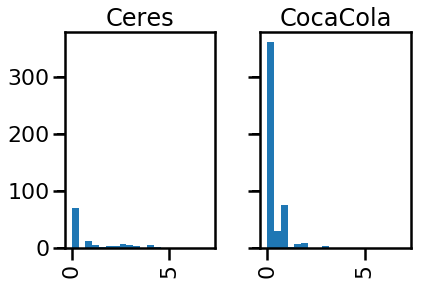

In [86]:
df_no_nan.ratio.hist(by=df_no_nan.brand, 
                     bins=20, sharey=True);

### Scatterplotting

If we are interested in more than one column, we might want to use the general `plot` method, and the `scatter` function. We need to define the `x` and `y` dimensions by giving a column name from our `DataFrame`.

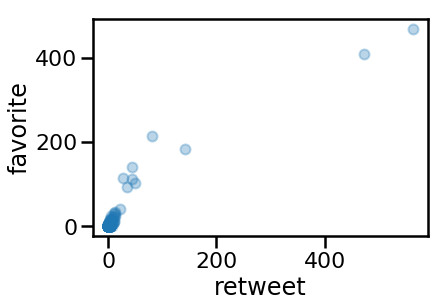

In [94]:
df_no_nan.plot.scatter(x='retweet', 
                       y='favorite', 
                       s=100, alpha=0.3);

To separate the two brands, you need to 
* make the first one a variable
* pass the variable to the second via `ax`
* set different colors

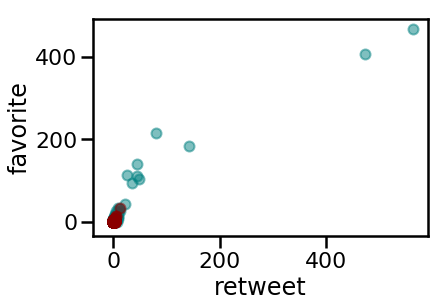

In [88]:
axis = df_no_nan[df_no_nan.brand != 'CocaCola'].plot.scatter(x='retweet', y ='favorite', color='teal', s=100, alpha=0.5);
df_no_nan[df_no_nan.brand == 'CocaCola'].plot.scatter(x='retweet', y ='favorite', color='darkred', ax=axis, s=100, alpha=0.5);

For many more plotting options, see [https://pandas.pydata.org/pandas-docs/stable/visualization.html](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

For more on visualizations in general, see [http://serialmentor.com/dataviz/](http://serialmentor.com/dataviz/)

## Correlations

The scatter plot suggested that there is some correlation in the data. Let's check. Luckily, there's a function for that: `corr()`.

In [89]:
df_no_nan[['retweet', 'favorite', 'ratio']].corr()

,retweet,favorite,ratio
retweet,1.000000,0.942010,0.087671
favorite,0.942010,1.000000,0.214995
ratio,0.087671,0.214995,1.000000


## Views

We can subselect a number of columns via slicing (a *view*) and put them in a new `DataFrame`by using `copy()`.

In [90]:
new_view = df_no_nan[['retweet', 'favorite', 'brand', 'ratio', 'reply', 'media']].copy()
new_view.head()

,retweet,favorite,brand,ratio,reply,media
0,3,3,CocaCola,1.0,KenShadewalker,
1,0,2,CocaCola,0.0,dgingiss,
2,0,1,CocaCola,0.0,Lianne_Wan,
3,2,1,CocaCola,0.5,ayman_abduallah,
4,1,5,CocaCola,5.0,Bunson8r,


## Grouping

We can group our data by columns. This is useful for example in visualization. Rather than showing two plots as before, we can overlay them (we use `alpha` to set the transparency):

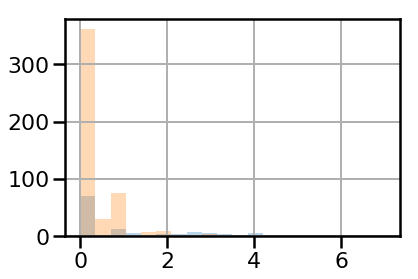

In [95]:
new_view.groupby('brand')['ratio'].hist(bins=20, alpha=0.3);

Let's check the correlation between `retweet` and `favorite` again, but for each brand:

In [34]:
df_no_nan.groupby('brand')[['retweet', 'favorite', 'ratio']].corr()

retweet  favorite     ratio
brand                                          
Ceres    retweet   1.000000  0.944070  0.035802
         favorite  0.944070  1.000000  0.162927
         ratio     0.035802  0.162927  1.000000
CocaCola retweet   1.000000  0.555867  0.353034
         favorite  0.555867  1.000000  0.556198
         ratio     0.353034  0.556198  1.000000

We can also get aggregate statistics for the groups. We use `groupby()`, and then specify how to aggregate the data. Possible aggregators are
* `sum()`
* `count()`
* `min()`
* `max()`
* `mean()`
* `median()`

... and many more. See [https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/) for more examples

In [35]:
new_view.groupby('brand').sum()

,retweet,favorite,ratio
brand,,,
Ceres,1701,2380,138.969404
CocaCola,448,384,158.138462


Note that his does not include the `reply` column, since its values are strings and cannot be summed!

In [36]:
new_view.groupby('brand').describe()

retweet                                                  favorite  \
           count       mean        std  min  25%  50%  75%    max    count   
brand                                                                        
Ceres      127.0  13.393701  66.230137  0.0  0.0  1.0  3.0  562.0    127.0   
CocaCola   493.0   0.908722   1.207103  0.0  0.0  0.0  2.0   13.0    493.0   

                     ...              ratio                                \
               mean  ...  75%    max  count      mean       std  min  25%   
brand                ...                                                    
Ceres     18.740157  ...  7.5  469.0  127.0  1.094247  1.525215  0.0  0.0   
CocaCola   0.778905  ...  1.0   33.0  493.0  0.320768  0.650066  0.0  0.0   

                              
          50%       75%  max  
brand                         
Ceres     0.0  2.061224  7.0  
CocaCola  0.0  0.500000  7.0  

[2 rows x 24 columns]

Hmm, that's a bit much. Luckily, we can cutomize our aggregation for each column we want, even with our own functions:

In [38]:
def unique_values(series):
    return len(set(series.values))

new_view.groupby('brand').aggregate({'media': ['sum', 'count'],
                                     'favorite': 'max',
                                     'retweet': 'max',
                                     'ratio': 'mean',
                                     'reply': unique_values
                                    })

media       favorite  \
                                                        sum count      max   
brand                                                                        
Ceres     http://twitter.com/Ceres/status/68105193695141...   127      469   
CocaCola                                                      493       33   

         retweet     ratio         reply  
             max      mean unique_values  
brand                                     
Ceres        562  1.094247            56  
CocaCola      13  0.320768           453